# Evolutionary SVM Kernel Selection
This is a basic bit of code to implement an evolutionary kernel selection for support vector machines. It is likely not very efficient, but may provide some interesting properties.

# Sample Data
As a simple sample dataset, the heart failure prediction dataset is used for the time being: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [102]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv('./heart.csv')
data = pd.get_dummies(data, drop_first = True, dtype = int)
data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [103]:
X = data.drop(['HeartDisease'], axis=1)
Y = data['HeartDisease']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=133)

In [104]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we will define the evolution process. The genome of each individual is made up of the coefficients of each degree of the polynomial.

In [105]:
num_individuals = 10


In [ ]:
my_kernel ' '

In [100]:
model = svm.SVC(kernel='poly')
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(f'Accuracy is {accuracy_score(Y_test, predictions)}, Precision is {precision_score(Y_test, predictions)}, Recall is {recall_score(Y_test, predictions)}')

Accuracy is 0.855072463768116, Precision is 0.864516129032258, Recall is 0.8758169934640523


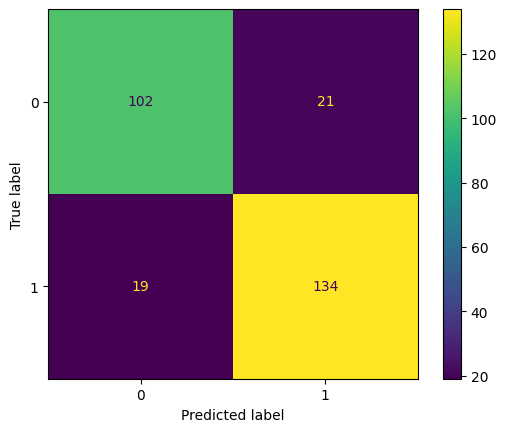

In [101]:
confusion_matrix = confusion_matrix(Y_test, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()